In [1]:
# the purpose of this notebook is to test an analytical solution for my model
# for the special case where sediment supply is infinite (H >> H*)
# and attrition does not occur (beta = 0)
# a derivation (taken from the gravel river transporter tutorial) is below

In [2]:
# start by importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# now set up arrays and parameters
dx = 1000 # grid spacing
x = np.arange(0, 5000, dx) # domain length

# H = 100 + np.zeros(len(x)) # sediment thickness
z = np.linspace(1, 0, len(x)) # + H # need to start with slight bedrock slope
#z = np.zeros(len(x))

U = 0.001 # uplift rate
phi = 0.55 # sediment porosity
kqs = 0.041 # sediment discharge coefficient
I = 0.01 # intermittency factor
r = 10. # runoff rate
kxb = 25 # valley width coeffecient
Pxb = (1/5) # valley width exponent
# Hstar = 0.1 # characteristic sediment thickness

B = kxb * (x**Pxb) # valley width 
# B = 100
# Q = B * r * x # total discharge
Q = (r * x**(6/5))/(1 + Pxb)

tau = 5
gamma = 0.5

In [4]:
# now create a function that attempts to capture this all as simply as possible
# don't need bedrock slope because that's only for calculating channel width, 
# and we're not even worrying about that as a comparison metric

def all_sed(dx, x, z, U, phi, kqs, I, r, kxb, Pxb, B, Q, tau, gamma, num_steps=700):
    
    # set timestep
    dt = (0.5 * dx * dx / (kqs*Q[-1]))
    
    # create arrays
    Qs = np.zeros(len(x))
    E = np.zeros(len(x))
    dzdt = np.zeros(len(x))
    
    # set boundary conditions
    Qs[0] = 0
    #E[-1] = 0
    dzdt[-1] = U
    
    for i in range(num_steps):
        
        # calculate slope
        S = np.abs(np.diff(z)/dx)
        
        # calculate sediment transport
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.)
        
        # erosion
        # E[:-1] = (1/((1-phi)*B[1:])) * (np.diff(Qs)/dx) # - ql[1:])
        E[1:] = (1/((1-phi)*B[1:])) * ((np.diff(Qs)/dx)) # - (U*gamma*B[1:]))
        #cE[0] = E[1]
        
        # calculate rate of elevation change
        # dzdt[1:] = U - E[1:]
        dzdt[:-1] = U - E[1:]
        # dzdt[:] = U - E[:]
        # dzdt[-1] = dzdt[-2]
        
        # update profile
        # z[:-1] += dzdt[1:] * dt
        # z[:-1] += dzdt[:-1] * dt
        z += dzdt * dt
        
#         print('starting slope for step', i, ":", S, "\n")
#         print('final elevation for step', i, ":", z, "\n")
        
    cum_time = num_steps * dt
#     print('starting slope:', S, "\n")
#     print('final elevation:', z)
    # print(cum_time)
        
    return (S, Qs, E, dzdt, z, dt) #, wt, E_vals, E_avg, dt)

In [5]:
# now write a test
test = [dx, x, z, U, phi, kqs, I, r, kxb, Pxb, B, Q, tau, gamma]

# and run it
slope, Qs, E, dzdt, model_z, dt = all_sed(*test)

In [6]:
slope

array([0.00025012, 0.00025002, 0.00025   , 0.00024893])

In [7]:
model_z

array([49.75118375, 49.50106387, 49.25103935, 49.00103754, 48.75211306])

In [8]:
dzdt

array([0.00099998, 0.00099998, 0.00099998, 0.00099998, 0.001     ])

In [9]:
E

array([0.00000000e+00, 1.90673059e-08, 2.15186194e-08, 2.20218533e-08,
       2.18708073e-08])

In [10]:
print(Q)
print(Qs)

[     0.          33175.59754612  76217.50865455 123983.60491032
 175101.85362692]
[0.         0.00085397 0.00196103 0.00318969 0.00448219]


In [11]:
print((Qs[1:]/Q[1:]))

[2.57408629e-08 2.57294294e-08 2.57267076e-08 2.55975950e-08]


In [12]:
E

array([0.00000000e+00, 1.90673059e-08, 2.15186194e-08, 2.20218533e-08,
       2.18708073e-08])

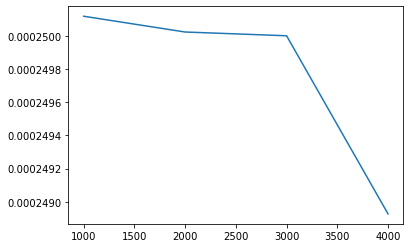

In [13]:
plt.plot(x[1:], slope)

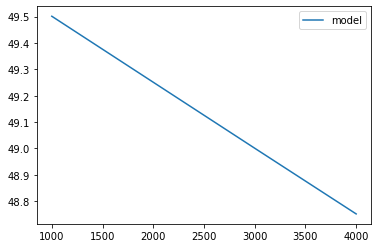

In [14]:
plt.plot(x[1:], model_z[1:], label = 'model')
plt.legend()

In [15]:
slope_pred = ((U*phi)/(kqs * I * r))**(6./7)
y = (-slope_pred * x) + model_z[0]

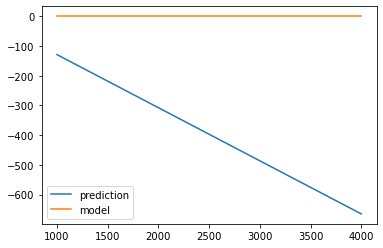

In [16]:
plt.plot(x[1:], y[1:], label = 'prediction')
plt.plot(x[1:], slope, label = 'model')
plt.legend()

In [17]:
slope_pred

0.17873533888944737

In [18]:
slope

array([0.00025012, 0.00025002, 0.00025   , 0.00024893])